In [ ]:
!pip install strawberryfields

# Introduction to Quantum Photonics

So far we have looked at quantum circuits where the information carriers are two-level systems called "qubits". This comes under the umbrella of Discrete Variable Quantum Computing. Many physical systems are inherently continuous, i.e. they have an infinite-dimensional Hilbert-space. For example, photons can be used as information carriers. This model is called Continuous Variable Quantum Computation. The CV model is suitable for simulation of bosonic systems (ex: harmonic oscillators, phonons, BECs) and systems where continuous quantum operators such as the position and momentum operators are of relevant interest.  

## Comparison of CV quantum computation with the qubit model
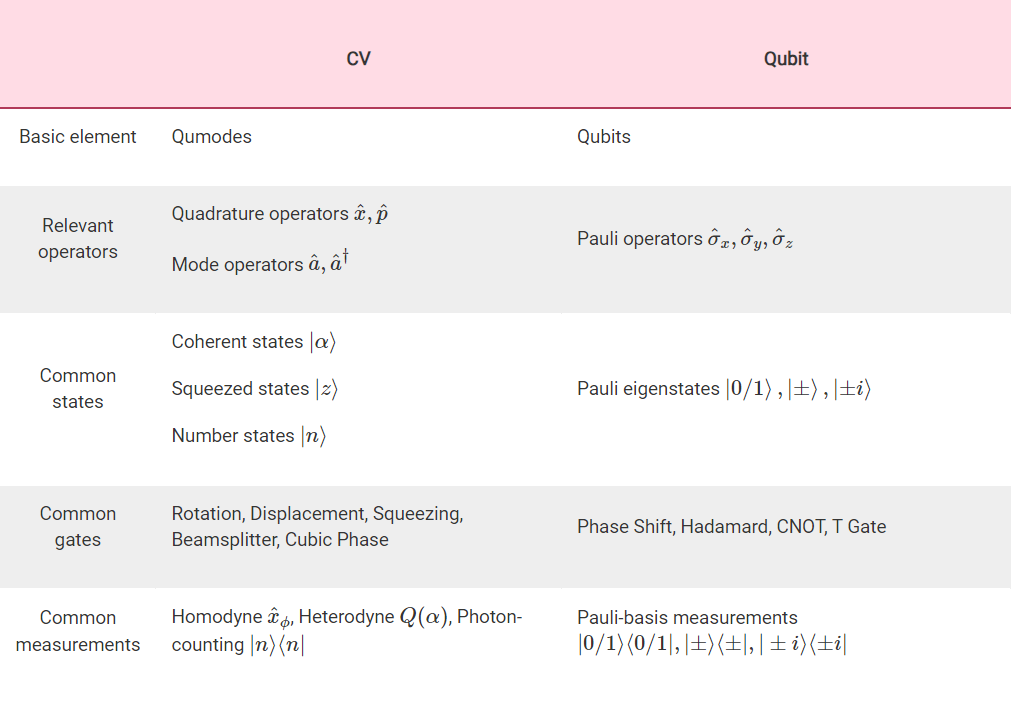

Find more info at:

[Quantum computing overview: discrete vs. continuous variable models](https://arxiv.org/pdf/2206.07246),

[Introduction to Quantum Photonics](https://strawberryfields.ai/photonics/concepts/photonics.html#introduction)

## Important Operators

### Creation and Annihilation Operators
One of the most basic operators used in CV quantum computation are the bosonic creation and annihilation operators $\hat{a}^\dagger$ and $\hat{a}$. A creation operator increases the number of particles in a given state by one, and an annihilation operator decreases the number of particle in a given state by one.

In our case, the creation operator will increase the number of photons in a qumode, and an annihilation operator will decrease the number of photons in a qumode. When the number of photons in a qumode is zero, it is said to be in the Vacuum State.

Each qumode has its own set of creation and annihilation operators, which commute with those of the other qumodes.

Consider a quantum state $|n\rangle$, which specifies that the qumode has $n$ photons. This is a **Fock state**, which tells us the occupation number. The action of these creation and annihilation operators on the Fock states is given as follows:

$$\hat{a}^\dagger|n\rangle = \sqrt{n+1}|n+1\rangle$$

$$\hat{a}|n\rangle = \sqrt{n}|n-1\rangle$$


### Number operator
The number operator is $\hat{n} := \hat{a}^\dagger\hat{a}$. The action of the number operator is given as follows:

$$\hat{n}|n\rangle = n|n\rangle$$

where $|n\rangle$ are the Fock states with eigenvalue $n$.


_**Exercise:** Show that $\hat{n} = \hat{a}^\dagger\hat{a}$_


# Creating a Photonic Quantum Program

We can use Xanadu's Strawberry Fields library to construct and simulate photonic quantum circuits.



In [ ]:
import strawberryfields as sf
from strawberryfields import ops
import numpy as np

Every photonic circuit is characterized by a `Program` object. The `with` statement is used to populate the `Program` with quantum operators. operators are applied to various modes of the circuit using syntax

`ops.Gatename(arg1, arg2, ...) | (q[i], q[j], ...)`,  

where `ops.Gatename` is a quantum operation, `arg1, arg2` are its parameters, and `q` is the variable representing quantum registers/qumodes upon which the operator will act.
This syntax is from the Blackbird programming language, which is a quantum assembly language capable of representing basic CV states, gates and measurements.

Unless otherqise specified, the state in every qumode is initialized to the Vacuum State $|0\rangle$.

Let us create a quantum circuit with 2 qumodes.

In [ ]:
# Create a 2-mode quantum program
prog = sf.Program(2)

# Prepare the initial state
with prog.context as q:
  ops.Fock(1) | q[0]
  ops.Fock(2) | q[1]

# Prepare the circuit
with prog.context as q:
  ops.Rgate(np.pi/2) | q[0]
  ops.Rgate(np.pi/4) | q[1]
  ops.BSgate(np.pi/4) | (q[0], q[1])

  #######
  # you may add any other gates to make a circuit of your choice!
  #######

  # Perform a photon counting measurement in the Fock basis
  ops.MeasureFock() | q

# Running the program

Strawberry Fields provides several backend simulators for simulating the quantum program. An **engine** must be initialized for this, which is responsible for executing the program on a specific backend.

In [ ]:
# Initialize a Fock backend with a cutoff dimension of 3

eng = sf.Engine("fock", backend_options={"cutoff_dim": 3})

We are using the `fock` backend, which is written in NumPy. This backend represents the quantum state and operations via the Fock basis. Truncation of the Fock space introduces some numerical error, which is a limitation. Increasing the cutoff results in higher accuracy with the tradeoff of increased memory consumption.

Information on other backends available can be found in the documentation of this library [here](https://https://strawberryfields.readthedocs.io/en/stable/introduction/circuits.html).

Once the engine has been initialized, the quantum program can be executed on the selected backend via `Engine.run()`, specifying shots for multiple instances if required.

In [ ]:
result = eng.run(prog)

# Results

The returned `Result` object provides useful properties.

`Result.state`: The quantum state object contains details and methods for manipulation of the final state.



In [ ]:
print(result.state)

<FockState: num_modes=2, cutoff=3, pure=False, hbar=2>


In [ ]:
state = result.state
state.trace() # trace of the quantum state

1.0

`Result.samples`: Measurement samples from any measurements performed.

In [ ]:
result.samples

array([[2, 1]])

You have now executed your first photonic quantum circuit!


### **Try making a four-mode photonic circuit now!**

#### [BONUS]

_**Homework**: Use the matrix forms of the Rgate and BSgate operators to construct the effective circuit unitary and apply it on the initial state as defined, in order to compute the output state._

Rgate performs a rotation in the phase space.

$$\hat{R}(\theta) = e^{i\theta\hat{a}^\dagger\hat{a}}$$

BSgate($\pi/4$) is a 50-50 beam-splitter.

$$\hat{B}(\theta, \phi) = \exp\Bigl(\theta(e^{i\phi\hat{a}_1\hat{a}_2^\dagger} - e^{-i\phi\hat{a}_1^\dagger\hat{a}_2})\Bigr)$$

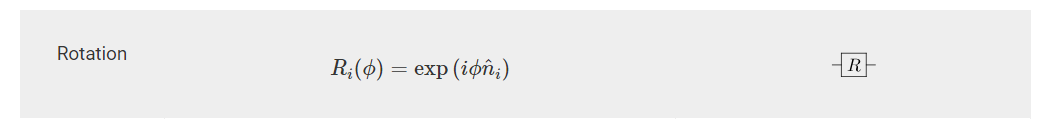

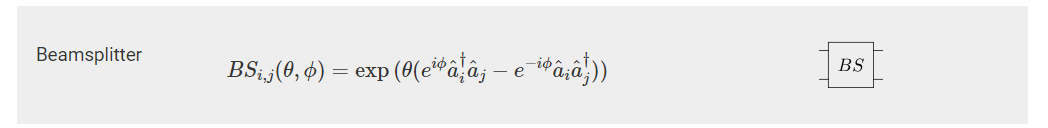